# Predição de Saída de Funcionários com Regressão Logística

## 1. Introdução do Projeto
- Objetivo: Prever a saída de funcionários com base em variáveis de perfil e comportamento, usando Regressão Logística.
- Aplicação: Identificar colaboradores em risco e ajudar o RH na retenção proativa.

## 2. Dicionário de Dados

| Variável                          | Descrição                                                                     |
|----------------------------------|-------------------------------------------------------------------------------|
| **ID**                           | Matrícula do funcionário                                                      |
| **Funcionário_deixou_a_empresa** | Marcação se o funcionário deixou a empresa recentemente                      |
| **Idade**                        | Idade do funcionário                                                          |
| **Frequência de Viagens**        | Frequência de viagens a trabalho do funcionário                               |
| **Distância_do_trabalho**        | Distância em Km até o trabalho                                                |
| **Formação**                     | Nível de formação                                                             |
| **E-Sat**                       | Satisfação com o clima organizacional                                         |
| **Gênero**                      | Gênero do funcionário                                                         |
| **Estado_Civil**                | Estado civil do funcionário                                                   |
| **Salário**                     | Salário mensal                                                                |
| **Quant. de Empresas Trabalhadas** | Quantidade de empresas que o funcionário já trabalhou                         |
| **Faz_hora_extras**             | Se funcionário costuma fazer hora extra                                       |
| **Equilibrio_de_Vida**          | Nota que o funcionário deu para seu equilíbrio entre vida pessoal e profissional|
| **Tempo_de_empresa**            | Tempo em anos que o funcionário trabalha na empresa                           |

## 3. Importação e Limpeza de Dados

In [1]:
# Visualização e tratamento dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
df = pd.read_excel('../dados/rh.xlsx')
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Equilibrio_de_Vida,Tempo_de_empresa
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,Ruim,6
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,Muito bom,10
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,Muito bom,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,Muito bom,8
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,Muito bom,2


In [3]:
# Exclusão de colunas que não serão utilizadas no modelo
df = df.drop(columns=['ID', 'Equilibrio_de_Vida', 'E-Sat', 'Estado_Civil', 'Frequência de Viagens'])

# Primeiras 5 linhas do DataFrame
df.head()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
0,Sim,41,1,Ensino Técnico,M,5993,8,Sim,6
1,Não,49,8,Ensino Médio,H,5130,1,Não,10
2,Sim,37,2,Ensino Técnico,H,2090,6,Sim,0
3,Não,33,3,Mestrado,M,2909,1,Sim,8
4,Não,27,2,Ensino Médio,H,3468,9,Não,2


In [4]:
# Visualização das informações de cada variável
df.info() # Aparentemente, nenhum valor missing na base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Funcionário_deixou_a_empresa  1470 non-null   object
 1   Idade                         1470 non-null   int64 
 2   Distância_do_trabalho         1470 non-null   int64 
 3   Formação                      1470 non-null   object
 4   Gênero                        1470 non-null   object
 5   Salário                       1470 non-null   int64 
 6   Qte_Empresas_Trabalhadas      1470 non-null   int64 
 7   Faz_hora_extras?              1470 non-null   object
 8   Tempo_de_empresa              1470 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 103.5+ KB


In [5]:
# Visualização do número de linhas (1470) e colunas (9)
df.shape

(1470, 9)

In [6]:
df.isnull().sum()

Funcionário_deixou_a_empresa    0
Idade                           0
Distância_do_trabalho           0
Formação                        0
Gênero                          0
Salário                         0
Qte_Empresas_Trabalhadas        0
Faz_hora_extras?                0
Tempo_de_empresa                0
dtype: int64

In [7]:
# Valores estatísticos
df.describe()

,Idade,Distância_do_trabalho,Salário,Qte_Empresas_Trabalhadas,Tempo_de_empresa
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,2.693197,7.008163
std,9.135373,8.106864,4707.956783,2.498009,6.126525
min,18.000000,1.000000,1009.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,1.000000,3.000000
50%,36.000000,7.000000,4919.000000,2.000000,5.000000
75%,43.000000,14.000000,8379.000000,4.000000,9.000000
max,60.000000,29.000000,19999.000000,9.000000,40.000000


## 4. Engenharia de Variáveis

In [8]:
# Identificação das colunas categóricas
colunas_categoricas = [
    'Faz_hora_extras?',
    'Formação',
    'Gênero',
    'Funcionário_deixou_a_empresa'  # variável resposta
]

# Visualização do número de opções de cada variável categórica
df[colunas_categoricas].nunique()

Faz_hora_extras?                2
Formação                        5
Gênero                          2
Funcionário_deixou_a_empresa    2
dtype: int64

In [9]:
# Lista de opções de cada variável categórica
for coluna in colunas_categoricas:
    categorias = df[coluna].unique()
    print(f"{coluna} -> {categorias}")

Faz_hora_extras? -> ['Sim' 'Não']
Formação -> ['Ensino Técnico' 'Ensino Médio' 'Mestrado' 'Ensino Superior' 'Doutorado']
Gênero -> ['M' 'H']
Funcionário_deixou_a_empresa -> ['Sim' 'Não']


In [10]:
# Definição dos valores de cada variável categórica ordinal
formacao_ordinal = {
    'Ensino Técnico': 1,
    'Ensino Médio': 2,
    'Mestrado': 3,
    'Ensino Superior': 4,
    'Doutorado': 5
}

# Codificação ordinal
df['Formação'] = df['Formação'].map(formacao_ordinal)

# Definição dos valores das variáveis binárias
df['Funcionário_deixou_a_empresa'] = df['Funcionário_deixou_a_empresa'].map({'Sim': 1, 'Não': 0})
df['Faz_hora_extras?'] = df['Faz_hora_extras?'].map({'Sim': 1, 'Não': 0})
df['Gênero'] = df['Gênero'].map({'H': 1, 'M': 0})

In [11]:
# Visualização das 5 primeiras linhas do DataFrame
df.head()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
0,1,41,1,1,0,5993,8,1,6
1,0,49,8,2,1,5130,1,0,10
2,1,37,2,1,1,2090,6,1,0
3,0,33,3,3,0,2909,1,1,8
4,0,27,2,2,1,3468,9,0,2


In [12]:
# Percentual dos funcionários que deixaram a empresa
df.Funcionário_deixou_a_empresa.mean() # 16% dos funcionários da base deixaram a empresa

0.16122448979591836

In [13]:
# Visualização do número de linhas (1470) e colunas (9)
df.shape

(1470, 9)

##  5. Análise Exploratória

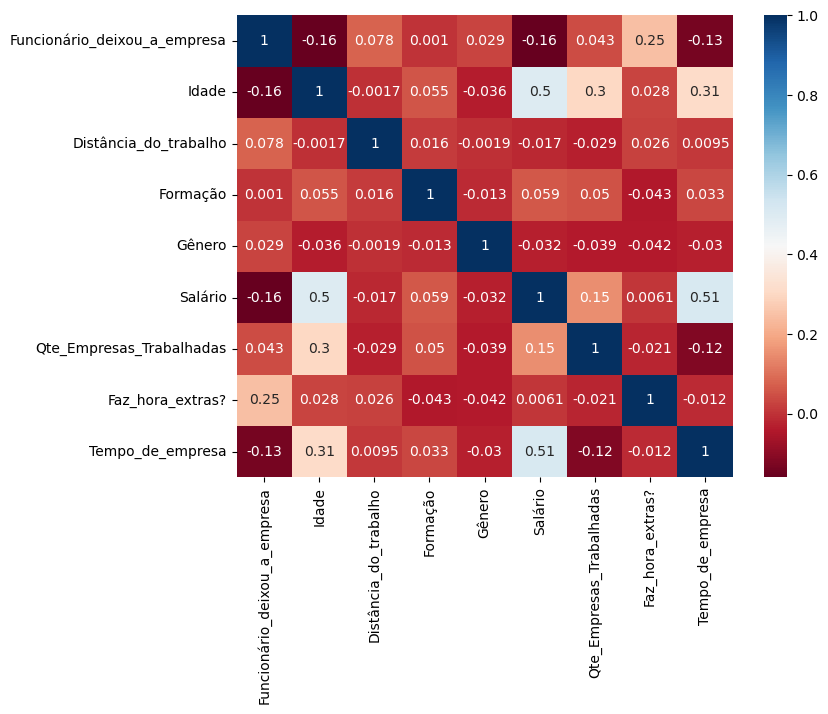

In [14]:
# Plotagem do gráfico de correlação
plt.figure(figsize=(8,6)) # Ajusta o tamanho da figura
sns.heatmap(df.corr(), cmap='RdBu', annot=True); # Troca a cor e coloca o valor da correlação dentro da matriz

#### Pouca correlação entre as variáveis. É provável que o modelo não sofra com problemas de multicolinearidade.

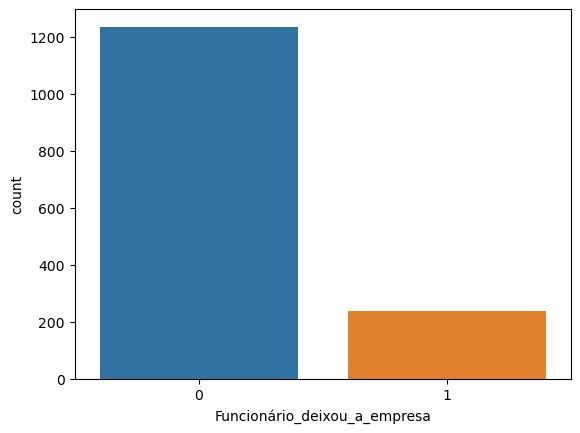

In [15]:
sns.countplot(x='Funcionário_deixou_a_empresa', data=df);

## 6. Separação em Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop(columns=['Funcionário_deixou_a_empresa'])
y = df['Funcionário_deixou_a_empresa']

In [18]:
x.head()

,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
0,41,1,1,0,5993,8,1,6
1,49,8,2,1,5130,1,0,10
2,37,2,1,1,2090,6,1,0
3,33,3,3,0,2909,1,1,8
4,27,2,2,1,3468,9,0,2


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Funcionário_deixou_a_empresa, dtype: int64

In [20]:
# Particiona a base em 70% para Treino e 30% para Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=50)

## 7. Treinamento do Modelo

In [21]:
modelo = LogisticRegression(max_iter=500, random_state=42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

## 8. Avaliação do Modelo (Cálculo do AUC)

In [22]:
y_pred = modelo.predict(X_train)
y_prob = modelo.predict_proba(X_train)[:, 1]

print("AUC:", roc_auc_score(y_train, y_prob))
# print(classification_report(y_train, y_pred))

AUC: 0.7437839422580241


In [23]:
# Teste
prob_test = modelo.predict_proba(X_test)[:,1]
roc_test = roc_auc_score(y_test, prob_test)
print("AUC em Teste:", roc_test)

AUC em Teste: 0.7755614769699277


## 9. Ajuste de Threshold (Ex: 0.25)

## 🔍 Avaliação do Modelo na Base de Teste

In [24]:
# Previsões na base de teste
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

### 📉 Matriz de Confusão (threshold padrão = 0.5)

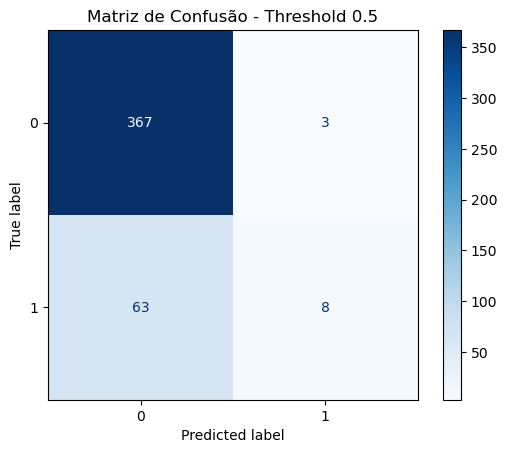

In [25]:
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Threshold 0.5')
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.73      0.11      0.20        71

    accuracy                           0.85       441
   macro avg       0.79      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441



### 📉 Matriz de Confusão com Threshold Ajustado (0.25)

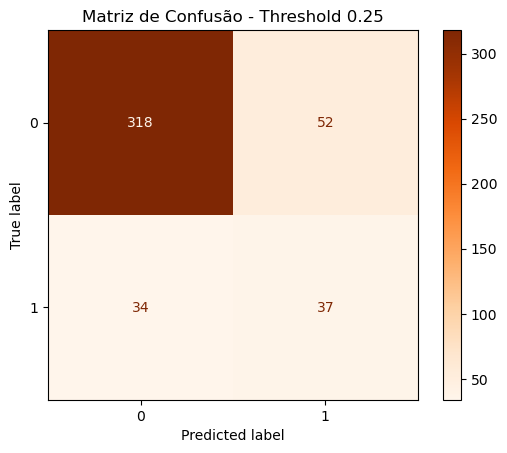

In [27]:
threshold = 0.25
y_pred_thresh = np.where(y_prob > threshold, 1, 0)
matriz_thresh = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_thresh, display_labels=[0, 1])
disp.plot(cmap='Oranges')
plt.title('Matriz de Confusão - Threshold 0.25')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       370
           1       0.42      0.52      0.46        71

    accuracy                           0.80       441
   macro avg       0.66      0.69      0.67       441
weighted avg       0.82      0.80      0.81       441



### 📈 Curva ROC

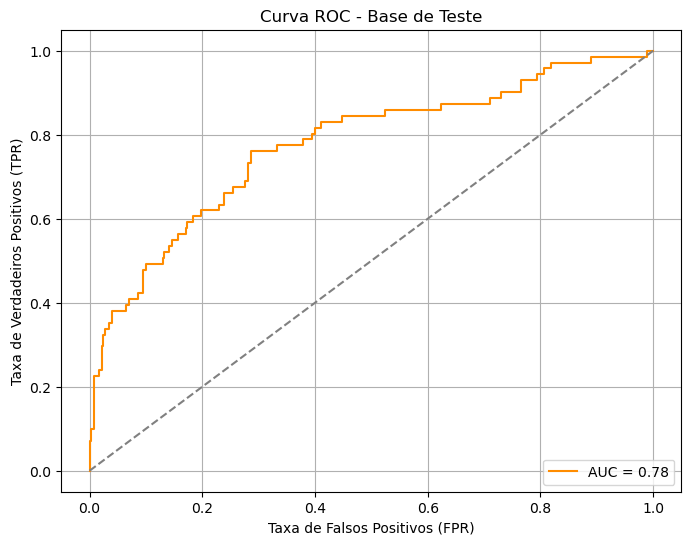

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Base de Teste')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 📊 4. Análise Exploratória (EDA)

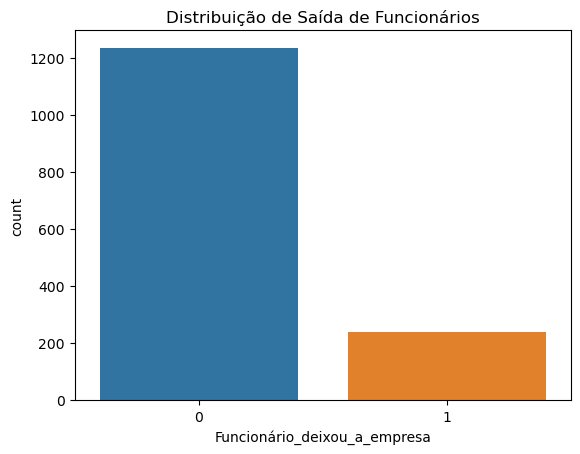

In [31]:
# Distribuição das saídas
sns.countplot(x='Funcionário_deixou_a_empresa', data=df)
plt.title('Distribuição de Saída de Funcionários')
plt.show()

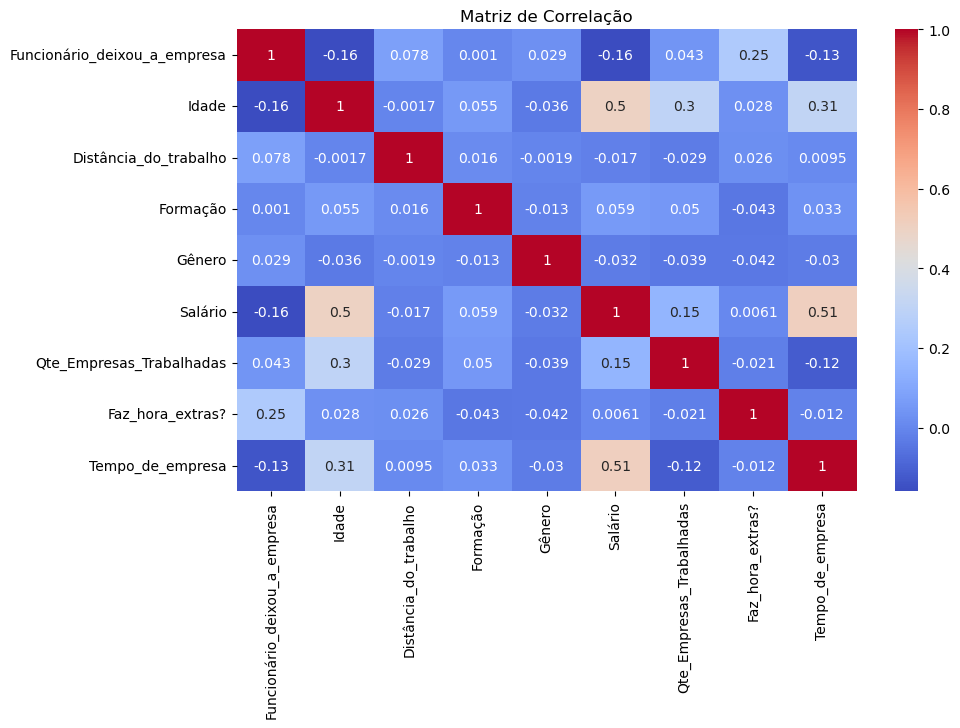

In [32]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## 🧪 10. Comparação AUC Treino x Teste

In [33]:
# Calcular AUC na base de treino para verificar overfitting
train_prob = modelo.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)

print("AUC Treino:", train_auc)
print("AUC Teste:", roc_auc_score(y_test, y_prob))

AUC Treino: 0.7437839422580241
AUC Teste: 0.7755614769699277


## 📋 11. Lista de Funcionários Ativos com Alta Probabilidade de Saída

In [34]:
# Adicionar coluna com probabilidade ao DataFrame de teste
X_test_copy = X_test.copy()
X_test_copy['Probabilidade_de_Saida'] = y_prob
X_test_copy['Funcionário_deixou_a_empresa'] = y_test.values

# Filtrar funcionários ativos
ativos = X_test_copy[X_test_copy['Funcionário_deixou_a_empresa'] == 0]
ativos_ordenados = ativos.sort_values(by='Probabilidade_de_Saida', ascending=False)

# Visualizar top 10 em risco
ativos_ordenados.head(10)

,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa,Probabilidade_de_Saida,Funcionário_deixou_a_empresa
1422,35,11,3,1,2660,7,1,2,0.527671,0
1436,21,5,2,1,2380,1,1,2,0.506599,0
38,36,5,3,0,3419,9,1,1,0.504258,0
889,27,14,4,1,2235,1,1,9,0.424010,0
284,26,11,1,1,4741,1,1,5,0.423836,0
380,24,10,3,0,4260,1,1,5,0.418831,0
865,30,29,3,1,4115,8,0,4,0.400655,0
717,27,16,3,0,2811,9,0,2,0.397228,0
912,26,4,1,1,2875,1,1,8,0.384605,0
602,30,2,4,0,6877,5,1,0,0.375789,0


## 12. Conclusão Final
- O modelo foi treinado com regressão logística e apresentou AUC de aproximadamente 0.74 na base de teste.
- Após análise, vimos que o threshold padrão (0.5) apresentava baixo recall para a classe de saída.
- Ajustamos para 0.25, o que aumentou a captura de quem realmente saiu.
- O modelo pode ser útil para o RH priorizar ações preventivas com base em risco predito.
- Recomenda-se:
  - Testar outros modelos (Random Forest, XGBoost)
  - Usar validação cruzada
  - Reavaliar o threshold ideal com business stakeholders